<h1 align="center"> ELO Ranking for professional Dota team</h1>

<h2 align="center"> The International 6 Invitation</h2>


In [14]:
# Some import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

<h2> Elo funtion and class</h2>


In [15]:
# Elo formula 
# R=R+KG(W-We)
# R = Elo rank
# K = Weight of competition
# G = coefficient according to the result

def compute_elo(Team1, Team2 ,score1, score2 ,Tournament):
    elo1 = Team1.elo 
    elo2 = Team2.elo 
    k = Tournament.weight
    We1 = 1/(1+10**(-(elo1-elo2)/400))
    We2 = 1/(1+10**(-(elo2-elo1)/400))
    
    if(score1==score2):
        elo1 = elo1 + k * 1 *(0.5-We1)
        elo2 = elo2 + k * 1 *(0.5-We2)
    elif(score1>score2+1):
        elo1 = elo1 + k * 1.5 *(1-We1)
        elo2 = elo2 - k * 1.5 *(We2)
    elif(score1>score2):
        elo1 = elo1 + k * 1 *(1-We1)
        elo2 = elo2 - k * 1 *(We2)
    elif(score2>score1+1):
        elo1 = elo1 - k * 1.5 *(We1)
        elo2 = elo2 + k * 1.5 *(1-We2)
    elif(score2>score1):
        elo1 = elo1 - k * 1 *(We1)
        elo2 = elo2 + k * 1 *(1-We2)
    
    Team1.elo = round(elo1)
    Team2.elo = round(elo2)

def display_rank(List_team):
    l =[]
    for team in List_team:
        l.append([team.name,team.elo,team.major,team.tournament])
    df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament"])
    return df.sort_values(by="Rank", ascending=0).reset_index(drop=True)

In [16]:
class Team:
    def __init__(self,name, elo=1000, major=0, tournament=0,invited=False,place="17"):
        self.elo = elo
        self.name = name
        self.major = major
        self.tournament = tournament
        self.invited=invited
        self.place=place
        
    
class Tournament:
        def __init__(self,name, weight):
            self.weight = weight
            self.name = name

### Weight of tournament
* The International: 60
* Major: 50
* Cash price >200k: 30
* Cash price >100k & <200k: 20
* Cash price <100K: 10

<h2>Manila Major</h2>


In [17]:
# Create Tournament
Manila_major = Tournament("The Minila Major 2016",50)

Evil_Geniuses  = Team("Evil Geniuses", 1000,place="13-16")
Secret  = Team("Team Secret", 1000,place="13-16")
LGD_Gaming  = Team("LGD Gaming", 1000,invited=True,place="4")
Newbee  = Team("Newbee", 1000,invited=True,place="3")
Fnatic  = Team("Fnatic", 1000,place="5-6")
Alliance = Team("Alliance",1000,place="9-12")
OG = Team("OG",1000,invited=True,place="1")
TL = Team("Team Liquid",1000,invited=True,place="2")
Complexity = Team("compLexity Gaming", 1000,place="9-12")
MVP_Phoenix=Team("MVP Phoenix", 1000,invited=True,place="5-6")
Wings = Team("Wings Gaming",1000,place="13-16")
VGr = Team("Vici Gaming Reborn",1000,place="7-8")
Navi = Team("Natus Vincere",1000,place="7-8",invited=True)
DC = Team("Digital Chaos",1000,place="9-12")
Empire = Team("Team Empire", 1000,place="9-12")
Mineski = Team("Mineski", 1000,place="13-16")


List_team = [Evil_Geniuses,Secret,LGD_Gaming,Newbee,Fnatic
             , Alliance, OG, TL, Complexity, MVP_Phoenix, VGr,Navi,DC,Empire,Mineski, Wings]


In [18]:
# Group stage
compute_elo(OG,Empire,2,0,Manila_major)
compute_elo(Newbee,Complexity,2,0,Manila_major)
compute_elo(Newbee,OG,2,0,Manila_major)
compute_elo(Empire,Complexity,2,0,Manila_major)
compute_elo(OG,Empire,2,1,Manila_major)

compute_elo(DC,Wings,2,1,Manila_major)
compute_elo(Navi,Secret,2,0,Manila_major)
compute_elo(Navi,DC,2,0,Manila_major)
compute_elo(Wings,Secret,2,1,Manila_major)
compute_elo(DC,Wings,2,0,Manila_major)

compute_elo(TL,Alliance,2,1,Manila_major)
compute_elo(Fnatic,VGr,2,0,Manila_major)
compute_elo(TL,Fnatic,2,1,Manila_major)
compute_elo(Alliance,VGr,2,0,Manila_major)
compute_elo(Fnatic,Alliance,2,1,Manila_major)

compute_elo(Evil_Geniuses,Mineski,2,1,Manila_major)
compute_elo(LGD_Gaming,MVP_Phoenix,2,0,Manila_major)
compute_elo(LGD_Gaming,Evil_Geniuses,2,1,Manila_major)
compute_elo(MVP_Phoenix,Mineski,2,1,Manila_major)
compute_elo(MVP_Phoenix,Evil_Geniuses,2,0,Manila_major)

# Play-off
compute_elo(MVP_Phoenix,TL,2,0,Manila_major)
compute_elo(OG,Navi,2,0,Manila_major)
compute_elo(Newbee,DC,2,1,Manila_major)
compute_elo(Fnatic,LGD_Gaming,2,1,Manila_major)
compute_elo(OG,MVP_Phoenix,2,0,Manila_major)
compute_elo(Newbee,Fnatic,2,0,Manila_major)
compute_elo(OG,Newbee,2,1,Manila_major)

compute_elo(Complexity,Wings,1,0,Manila_major)
compute_elo(Alliance,Mineski,1,0,Manila_major)
compute_elo(VGr,Evil_Geniuses,1,0,Manila_major)
compute_elo(Empire,Secret,1,0,Manila_major)
compute_elo(TL,Complexity,2,0,Manila_major)
compute_elo(Navi,Alliance,2,1,Manila_major)
compute_elo(VGr,DC,2,1,Manila_major)
compute_elo(LGD_Gaming,Empire,2,0,Manila_major)
compute_elo(TL,Navi,2,0,Manila_major)
compute_elo(LGD_Gaming,VGr,2,1,Manila_major)
compute_elo(TL,Fnatic,2,0,Manila_major)
compute_elo(LGD_Gaming,MVP_Phoenix,2,0,Manila_major)
compute_elo(TL,LGD_Gaming,2,0,Manila_major)
compute_elo(TL,Newbee,2,1,Manila_major)
compute_elo(OG,TL,3,1,Manila_major)

OG.elo+=Manila_major.weight
OG.major+=1

In [19]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1224,1,0
1,Team Liquid,1131,0,0
2,Newbee,1083,0,0
3,LGD Gaming,1080,0,0
4,Natus Vincere,1015,0,0
5,MVP Phoenix,999,0,0
6,Fnatic,998,0,0
7,Alliance,985,0,0
8,Digital Chaos,977,0,0
9,Vici Gaming Reborn,964,0,0


<h2>ESL One Frankfurt 2016</h2>


In [20]:
# Create Tournament
ESL = Tournament("ESL One Frankfurt 2016",30)

# Introducing new teams
VP = Team("Virtus.Pro",1000)
Vega = Team("Vega Squadron",1000)

List_team.append(VP)
List_team.append(Vega)

In [21]:
# Group stage

compute_elo(Vega,TL,2,1,ESL)
compute_elo(Alliance,Fnatic,2,1,ESL)
compute_elo(Vega,Alliance,2,1,ESL)
compute_elo(TL,Fnatic,2,0,ESL)
compute_elo(TL,Alliance,2,0,ESL)

compute_elo(OG,Navi,2,0,ESL)
compute_elo(Complexity,VP,2,1,ESL)
compute_elo(OG,Complexity,2,0,ESL)
compute_elo(Navi,VP,2,1,ESL)
compute_elo(Navi,Complexity,2,0,ESL)

# Play-off
compute_elo(OG,TL,2,1,ESL)
compute_elo(Navi,Vega,2,0,ESL)
compute_elo(OG,Navi,3,0,ESL) # Miracle support Pogchamp

OG.elo+=ESL.weight
OG.tournament+=1

In [22]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1293,1,1
1,Team Liquid,1129,0,0
2,Newbee,1083,0,0
3,LGD Gaming,1080,0,0
4,Natus Vincere,1047,0,0
5,Vega Squadron,1012,0,0
6,MVP Phoenix,999,0,0
7,Digital Chaos,977,0,0
8,Alliance,973,0,0
9,Virtus.Pro,968,0,0


In [23]:
l=[]
for team in List_team:
    l.append([team.name,team.elo,team.major,team.tournament,team.invited,team.place])
df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament", "Invited", "place"])

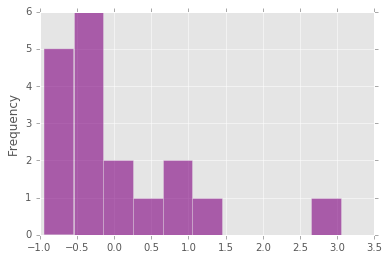

In [24]:
mean=df.Rank.mean()
std = df.Rank.std()
df["norm_elo"]=np.around((df.Rank-mean)/std, decimals=2)
df.norm_elo.plot.hist(alpha=0.6, color='purple')

In [25]:
df.to_csv("data/ti_2016.csv")

In [26]:
df.sort_values(by="Rank", ascending=0).reset_index(drop=True)

,team,Rank,Major,Tournament,Invited,place,norm_elo
0,OG,1293,1,1,True,1,3.05
1,Team Liquid,1129,0,0,True,2,1.32
2,Newbee,1083,0,0,True,3,0.83
3,LGD Gaming,1080,0,0,True,4,0.80
4,Natus Vincere,1047,0,0,True,7-8,0.45
5,Vega Squadron,1012,0,0,False,17,0.08
6,MVP Phoenix,999,0,0,True,5-6,-0.06
7,Digital Chaos,977,0,0,False,9-12,-0.29
8,Alliance,973,0,0,False,9-12,-0.33
9,Virtus.Pro,968,0,0,False,17,-0.39
